In [92]:
import math as mth
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat 

In [ ]:
#the following code reads in the SortedInterSeizureInterval.csv file 
#ISIs are already parsed and sorted 
import csv

file = open('SortedInterSeizureInterval.csv')
csvreader = csv.reader(file)
ISI = np.zeros((2613, 1))

for i in range(0, 2613):
  nextRow = next(csvreader)
  ISI[i] = float(nextRow[0])

print(ISI)

[[ 2.91666667]
 [ 3.99305556]
 [ 2.98611111]
 ...
 [16.98055556]
 [19.        ]
 [17.96319444]]


In [ ]:
#this method calculates a nondisjoint delay time embedding of a time series with embedding dimension d and time delay tau
#I think this might be O(d + tau) - all depends on how matrix partitioning works under the hood though
def TimeEmbedding(array, d, tau): 
  n = len(array)
  n_truncated = tau * (mth.floor(n/tau))
  m = n_truncated - tau*(d-1)
  #number of embeddings is the sequence length minus dimensionality-1 (d, points per embedding)
  #times the number of possible starting points for a unique embedding (tau, the time delay)

  array_truncated = array[0:n_truncated] #make sure test array length divisible by tau

  timeDelayedSequence = np.zeros((tau, mth.floor(n/tau))) 

  for i in range(0, tau):
    indxArray = [j for j in range(i,n_truncated,tau)]
    timeDelayedSequence[i,0:len(indxArray)] = array_truncated[indxArray,0]
  
  dimensionalTimeDelaySlice = np.zeros((tau,d))
  embedding = np.zeros((m,d))

  for i in range (0, mth.floor(m/tau)):
    dimensionalTimeDelaySlice = timeDelayedSequence[0:tau, i:i+d] 
    embedding[i*tau:(i+1)*tau, 0:d] = dimensionalTimeDelaySlice

  return[embedding, d, tau]

In [ ]:
#O(n) function for calculating binomial coefficents
def Combination(n,k):
  if(k==0):
    return(1)
  else:
    return((n/k)*Combination(n-1,k-1))

In [49]:
#use time delay embedding to to calculate the nth discrete derivative between each tau-th element of a time series
#I believe this is O(n^2)?
def derivativeCalc(array,n,tau):
  d = n + 1
  [embedding, d, tau] = TimeEmbedding(array,d,tau)

  coefVector = np.zeros((d,1))
  for i in range (0,d):
    coefVector[i] = ((-1)**(i)) * Combination(n,i) #coefficents of d repeated differences of a sequence is provably  +/- binomial coefficents 
  
  derivativeList = np.dot(embedding, coefVector)

  return(derivativeList)


In [142]:
def bootstrap(array,n): 
  #generate surrogate time series by uniformly scrambling the original time series
  #thus destroying any affect of temporal order 
  bootstraps = np.zeros((n, len(array)))
  for i in range (0,n):
    permute = np.random.permutation(array)
    bootstraps[i, 0:len(array)] = permute[0:len(array),0]

  return(bootstraps)

In [239]:
def exponentialNoise(array, n): 
  noise = np.zeros((n, len(array)))
  for i in range (0,n):
    mu = sum(array)/len(array) #arithemtic mean, scale function for exponential distribution
    noise[i, 0:len(array)] = np.random.exponential(mu,len(array))
  
  return(noise)

In [207]:
#test functions one can play with at their leisure
#cos is particularly interesting

n=10

linear = np.zeros((n,1))
for i in range(0,n):
  linear[i] = i

quadratic = np.zeros((n,1))
for i in range(0,n):
  quadratic[i] = i**2

cubic = np.zeros((n,1))
for i in range(0,n):
  cubic[i] = i**3

cosine = np.zeros((1,20))
for i in range (0,20,2):
  cosine[0,i] = (-1)**(i/2) # discrete cos(n*pi/2)

cosine = np.transpose(cosine)

In [211]:
tau = 1

ISI1 = ISI[0:np.argmax(ISI)-1]
ISI2 = ISI[2345:len(ISI)]

d1_ISI = derivativeCalc(ISI,1,tau)
d1_ISI1 = derivativeCalc(ISI1,1,tau)
d1_ISI2 = derivativeCalc(ISI2,1,tau)

In [268]:
array = ISI
mu = sum(array)/len(array)

#exponentially distributed comparison
exp =  np.transpose(exponentialNoise(ISI,1))
dexp = derivativeCalc(exp,1,1)

#bootstrapped comparisons
randISI = np.transpose(bootstrap(ISI,1))
randISI1 = np.transpose(bootstrap(ISI1,1))
randISI2 = np.transpose(bootstrap(ISI2,1))

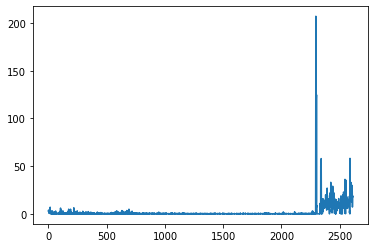

In [212]:
plt.plot(ISI)

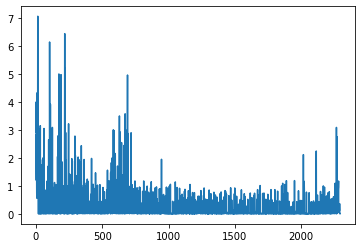

In [176]:
plt.plot(ISI1)

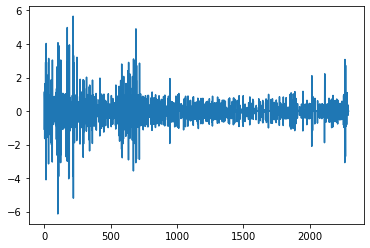

In [179]:
d1_ISI1 = derivativeCalc(ISI1, 1, 1)
plt.plot(d1_ISI1)